# Optimizer

In [1]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

torch.manual_seed(1)

In [2]:
LR=0.01
BATCH_SIZE=32
EPOCH=12

# 制造伪数据
x=torch.unsqueeze(torch.linspace(-1,1,1000),dim=1)  # torch.upsqueeze(x,dim=1) unsqueeze用来将一个数据列加上维度,dim=1指
                                                    # 定为一个列张量,dim=0指定为一个行张量
                                                    # torch.linspace(x,y,n) 生成n个x到y的数据的张量

In [3]:
y=x.pow(2)+0.1*torch.normal(torch.zeros(x.size()))


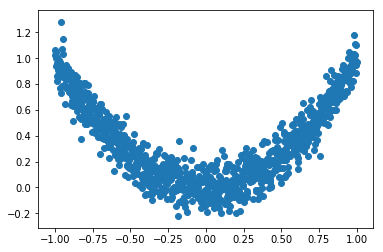

In [4]:
# 画图
plt.scatter(x.numpy(),y.numpy())
plt.show()

In [5]:
# DataLoader
torch_dataset=Data.TensorDataset(data_tensor=x,target_tensor=y)
loader=Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

In [6]:
# 构建神经网络
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(1,20)
        self.predict=torch.nn.Linear(20,1)
    
    def forward(self,x):
        x=F.relu(self.hidden(x))
        x=self.predict(x)
        return x
    
net_SGD=Net()
net_Momentum=Net()
net_RMSprop=Net()
net_Adam=Net()
nets=[net_SGD,net_Momentum,net_RMSprop,net_Adam]


In [7]:
# 几种常见优化器
opt_SGD=torch.optim.SGD(net_SGD.parameters(),lr=LR)
opt_Momentum=torch.optim.SGD(net_Momentum.parameters(),lr=LR,momentum=0.8)
opt_RMSprop=torch.optim.RMSprop(net_RMSprop.parameters(),lr=LR,alpha=0.9)
opt_Adam=torch.optim.Adam(net_Adam.parameters(),lr=LR,betas=(0.9,0.99))
optimizer=[opt_SGD,opt_Momentum,opt_RMSprop,opt_Adam]

loss_func=torch.nn.MSELoss()
losses_his=[[],[],[],[]]

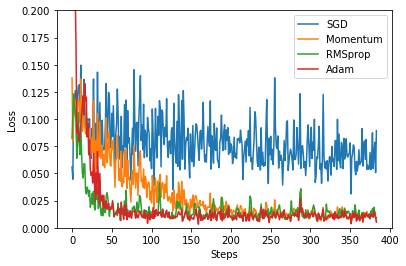

In [8]:
# 训练出图
for epoch in range(EPOCH):
    for step,(batch_x,batch_y) in enumerate(loader):
        b_x=Variable(batch_x)
        b_y=Variable(batch_y)
        
        for net,opt,l_his in zip(nets,optimizer,losses_his):
            output=net(b_x)
            loss=loss_func(output,b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data[0])

labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()